# 1. Pandas
## Importing the dataset

Throughout this course, you will use <code>pandas</code> to manipulate data and calculate summary statistics!

In this exercise, you will begin by importing <code>pandas</code> and the marketing dataset into your environment.

In [1]:
# Import pandas into the environment
import pandas as pd 

# Import marketing.csv 
marketing = pd.read_csv('..//Datasets/marketing.csv')

## Examining the data
Now that you've imported the data, you will examine it to ensure it is valid. While it may be tempting to dive into analysis, by validating your dataset immediately, you ensure that the insights you derive are both true and actionable. Ensuring the validity of your dataset should always be the first step you take when beginning analysis on a new dataset.

In [2]:
# Print the first five rows of the DataFrame
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [3]:
# Print the statistics of all columns
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [4]:
# Check column data types and non-missing values
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Updating the data type of a column
You will often want to modify the data type of columns to suit your needs. Pandas and Python have special functionalities around manipulating data types that can make your analysis easier and more robust, such as concatenating strings and summing boolean values. However, this functionality is only possible if columns are stored as the intended data type.

In [5]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [6]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype("bool")

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


## Adding new columns
Adding new columns that derive information from existing data or based on domain knowledge is known as _Feature Engineering_. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.

One of the most critical skills a data scientist needs to learn is how to identify opportunities for feature engineering.

In [7]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [8]:
# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing["language_displayed"] ==marketing["language_preferred"], "Yes", "No" )

## Date columns
Currently, the date columns in the <code>marketing</code> DataFrame are being incorrectly read as objects. We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.

In [9]:
# Import marketing.csv with date columns
marketing = pd.read_csv("..//Datasets/marketing.csv",
parse_dates = ["date_served", "date_subscribed", "date_canceled"])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

## Daily marketing reach by channel
In this exercise, you'll determine how many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month.

In [10]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

## Visualizing daily marketing reach
In the previous exercise, you created a <code>daily_subscribers</code> DataFrame, which contained the number of users who subscribed each day. While this was a great first step, it is challenging to interpret daily trends by looking at a table. To make it easier for you and your business stakeholders to notice subscriber trends, you will visualize your results using a line plot.

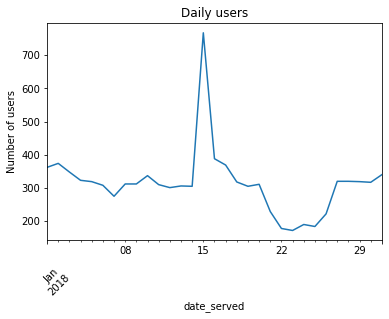

In [11]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()